<a href="https://colab.research.google.com/github/Laureoby/movies_dataset2/blob/new_file/Movies2_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
data = pd.read_csv('/content/drive/MyDrive/movies2.csv')
data.head()

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911.0,53.0,5.8,265.0,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,Asta Nielsen|Valdemar Psilander|Gunnar Helseng...,Drama
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911.0,48.0,5.9,100.0,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,Asta Nielsen|Max Obal|Robert Valberg,Drama
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912.0,100.0,5.1,620.0,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama|History
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911.0,71.0,7.0,3500.0,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,Salvatore Papa|Arturo Pirovano|Giuseppe de Lig...,Adventure|Drama|Fantasy
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912.0,46.0,6.4,145.0,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama


In [13]:
data.duplicated().sum()

0

In [14]:
data.isnull().sum()

Movie URL           0
Title              65
Poster            307
Release Year       73
Length in Min    1958
IMDB Rating        67
Rating Count       67
Plot               65
Directors         849
Writers          7057
Stars            1352
Genres            176
dtype: int64

In [15]:
#number of rows which has many Nan values
nan_count = data.isnull().sum(axis=1)
limit = 10
rows_with_nan = nan_count[nan_count >= limit]
print(f'We have {len(rows_with_nan)} with {limit} Nan values or more')
#We delete these rows
data = data.drop(rows_with_nan.index)
print(f'The dataset has {len(nan_count)} now with {len(data)} rows')

We have 65 with 10 Nan values or more
The dataset has 126691 now with 126626 rows


In [16]:
data = data.dropna(subset=['Poster'])

In [17]:
#We use interpolation
data['Release Year'].fillna(method='ffill', inplace=True)  # Remplissage avec la valeur précédente
data.isnull().sum()

Movie URL           0
Title               0
Poster              0
Release Year        0
Length in Min    1824
IMDB Rating         2
Rating Count        2
Plot                0
Directors         760
Writers          6903
Stars            1252
Genres             93
dtype: int64

In [18]:
#We use interpolation
data['Length in Min'] = data['Length in Min'].interpolate(method='linear')
data.isnull().sum()

Movie URL           0
Title               0
Poster              0
Release Year        0
Length in Min       0
IMDB Rating         2
Rating Count        2
Plot                0
Directors         760
Writers          6903
Stars            1252
Genres             93
dtype: int64

In [19]:
#We will replace Nan values in IMDB rating and Rating count by zero
data['IMDB Rating'].fillna(0.0, inplace=True)
data['Rating Count'].fillna(0.0, inplace=True)
data.isnull().sum()

Movie URL           0
Title               0
Poster              0
Release Year        0
Length in Min       0
IMDB Rating         0
Rating Count        0
Plot                0
Directors         760
Writers          6903
Stars            1252
Genres             93
dtype: int64

In [20]:
#for Directors, Writers and Stars, we will replace Nan values by values No names or Unknown name
fill_values = {'Directors': 'Unknown Name', 'Writers': 'Unknown Name', 'Stars': 'Unknown Name'}
data.fillna(value=fill_values, inplace=True)
data.isnull().sum()

Movie URL         0
Title             0
Poster            0
Release Year      0
Length in Min     0
IMDB Rating       0
Rating Count      0
Plot              0
Directors         0
Writers           0
Stars             0
Genres           93
dtype: int64

In [21]:
#Now we work on Genres column
data['Genres'].unique()

array(['Drama', 'Drama|History', 'Adventure|Drama|Fantasy', ...,
       'Animation|Crime|Horror', 'Comedy|Music|Thriller',
       'Documentary|History|Musical'], dtype=object)

In [22]:
data['Genres'].mode()

0    Drama
Name: Genres, dtype: object

In [23]:
data['Genres'].fillna('Drama', inplace=True)
data.isnull().sum()

Movie URL        0
Title            0
Poster           0
Release Year     0
Length in Min    0
IMDB Rating      0
Rating Count     0
Plot             0
Directors        0
Writers          0
Stars            0
Genres           0
dtype: int64

In [24]:
data.isnull().sum()
data.head()

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911.0,53.0,5.8,265.0,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,Asta Nielsen|Valdemar Psilander|Gunnar Helseng...,Drama
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911.0,48.0,5.9,100.0,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,Asta Nielsen|Max Obal|Robert Valberg,Drama
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912.0,100.0,5.1,620.0,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama|History
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911.0,71.0,7.0,3500.0,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,Salvatore Papa|Arturo Pirovano|Giuseppe de Lig...,Adventure|Drama|Fantasy
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912.0,46.0,6.4,145.0,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama


**Data** **visualization**

1) As a film enthusiast, I want to identify the top-rated movies across different genres, so that I can discover new high-quality films to watch.

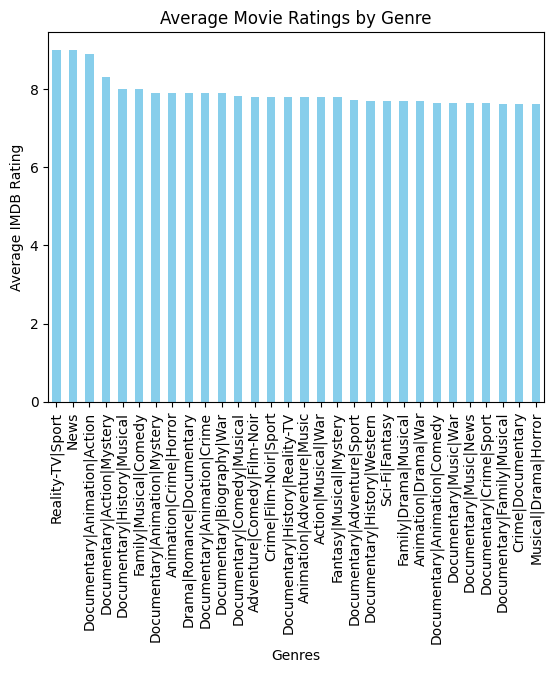

In [25]:
## Calculer la moyenne des évaluations IMDB par genre
top_movies = (data.groupby('Genres')['IMDB Rating'].mean().sort_values(ascending=False)).head(30)

# Créer un graphique en barres
top_movies.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average IMDB Rating')
plt.title('Average Movie Ratings by Genre')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

2) Analyze Cast and Crew Relationships: As a movie producer, I want to identify frequently collaborating actors, directors, or writers to understand successful filmmaking teams. TIP: Develop a network visualization showcasing frequent collaborators among actors, directors, and writers.

In [ ]:
import networkx as nx
# Supposons que vous avez un DataFrame 'collaborations' avec des colonnes 'Person1', 'Person2', 'Project'
G = nx.from_pandas_edgelist(data, 'Directors', 'Writers', 'Stars', create_using=nx.Graph())
nx.draw(G, with_labels=True)
plt.show()

3) As a marketing manager, I want to understand how user engagement (number of ratings) changes over time and identify genres with the most engaged audiences. Acceptance criteria: Generate charts illustrating the average number of ratings per year and compare it across different genres.

In [ ]:
# Group by year and genre then calculate average ratings
yearly_genre_ratings = data.groupby(['Release Year', 'Genres']).size().reset_index(name='Counts')
sns.lineplot(data=yearly_genre_ratings, x='Release Year', y='Counts', hue='Genre')
plt.show()